In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv(r"C:\Users\hemch\Downloads\Financial Projects\Financial_Health_Dataset.csv")

In [4]:
data.head()

,Days Sales Outstanding (DSO),Return on Assets (ROA),Financial Expenses / Sales,ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,Receivables Turnover,Debt to Assets Ratio,Inventory Turnover,Logarithm of Employees,Export Indicator,Import Indicator,Representative Indicator,Inconsistency Indicator,Year
0,1014.128862,0.011751,0.038505,0.965479,567.866550,0.532258,545.195964,0.301030,0,1,0,1,2006
1,561.974631,0.099662,0.015775,1.415467,335.917481,0.660556,7.950910,1.176091,1,1,1,1,2006
2,826.919025,0.009594,0.093562,1.575034,350.618086,0.550912,28.602221,1.204120,0,1,1,1,2006
3,493.176956,0.196284,0.000581,1.346780,414.508709,0.683717,1.216888,1.431364,0,0,0,1,2006
4,100.421465,0.179038,0.000173,3.299687,118.548381,0.254496,52.346321,1.518514,0,1,1,1,2006


In [5]:
data.rename(columns={' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ': 'Quick Ratio'}, inplace=True)

In [6]:
data.columns

Index(['Days Sales Outstanding (DSO)', 'Return on Assets (ROA)',
       'Financial Expenses / Sales', 'Quick Ratio', 'Receivables Turnover',
       'Debt to Assets Ratio', 'Inventory Turnover', 'Logarithm of Employees',
       'Export Indicator', 'Import Indicator', 'Representative Indicator',
       'Inconsistency Indicator', 'Year'],
      dtype='object')

In [7]:
data.head()

,Days Sales Outstanding (DSO),Return on Assets (ROA),Financial Expenses / Sales,Quick Ratio,Receivables Turnover,Debt to Assets Ratio,Inventory Turnover,Logarithm of Employees,Export Indicator,Import Indicator,Representative Indicator,Inconsistency Indicator,Year
0,1014.128862,0.011751,0.038505,0.965479,567.866550,0.532258,545.195964,0.301030,0,1,0,1,2006
1,561.974631,0.099662,0.015775,1.415467,335.917481,0.660556,7.950910,1.176091,1,1,1,1,2006
2,826.919025,0.009594,0.093562,1.575034,350.618086,0.550912,28.602221,1.204120,0,1,1,1,2006
3,493.176956,0.196284,0.000581,1.346780,414.508709,0.683717,1.216888,1.431364,0,0,0,1,2006
4,100.421465,0.179038,0.000173,3.299687,118.548381,0.254496,52.346321,1.518514,0,1,1,1,2006


## STEP 1: Data Preprocessing

**Load and Explore Data:** Load the dataset and understand its structure.

**Handle Missing Values:** Impute or remove missing values if necessary.

**Normalize/Standardize Data:** Scale the data to ensure all features contribute equally to the model.

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Days Sales Outstanding (DSO)    0
Return on Assets (ROA)          0
Financial Expenses / Sales      0
Quick Ratio                     0
Receivables Turnover            0
Debt to Assets Ratio            0
Inventory Turnover              0
Logarithm of Employees          0
Export Indicator                0
Import Indicator                0
Representative Indicator        0
Inconsistency Indicator         0
Year                            0
dtype: int64


## Normalize/Standardize the Data

We will normalize the data using StandardScaler to ensure all features have a mean of 0 and a standard deviation of 1.

In [9]:
from sklearn.preprocessing import StandardScaler

# Define the feature set and target variable
X = data.drop(columns=['Inconsistency Indicator'])
y = data['Inconsistency Indicator']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split the Data into Training and Testing Sets

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (8572, 12)
Testing set shape: (2144, 12)


## STEP 2: Exploratory Data Analysis (EDA)

**Conduct EDA to Understand the Data Distribution**

In [11]:
print(data.describe())

       Days Sales Outstanding (DSO)  Return on Assets (ROA)  \
count                  10716.000000            10716.000000   
mean                     446.399496                0.037484   
std                      386.634236                0.126532   
min                        0.654350               -0.600000   
25%                      173.160013                0.004531   
50%                      325.365223                0.028217   
75%                      570.802351                0.080520   
max                     1500.000000                0.500000   

       Financial Expenses / Sales   Quick Ratio  Receivables Turnover  \
count                10716.000000  10716.000000          10716.000000   
mean                     0.028929      1.142252            213.448023   
std                      0.038007      0.871149            216.243734   
min                      0.000000      0.000661              0.000000   
25%                      0.002010      0.718023             82.2193

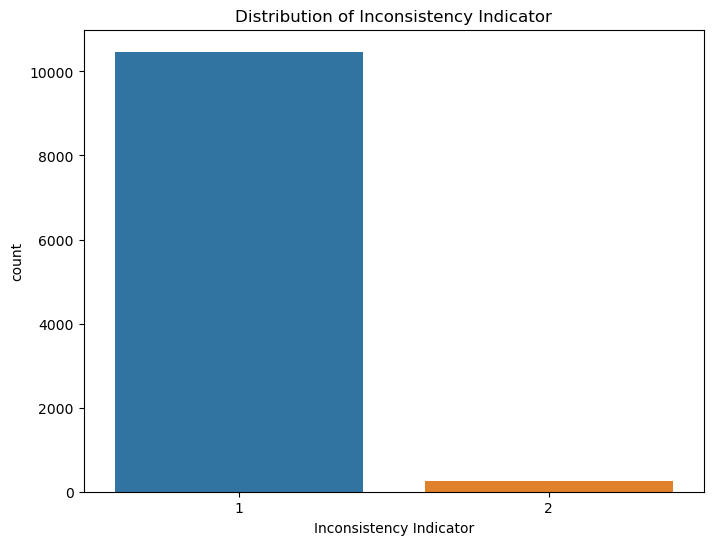

In [12]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Inconsistency Indicator')
plt.show()

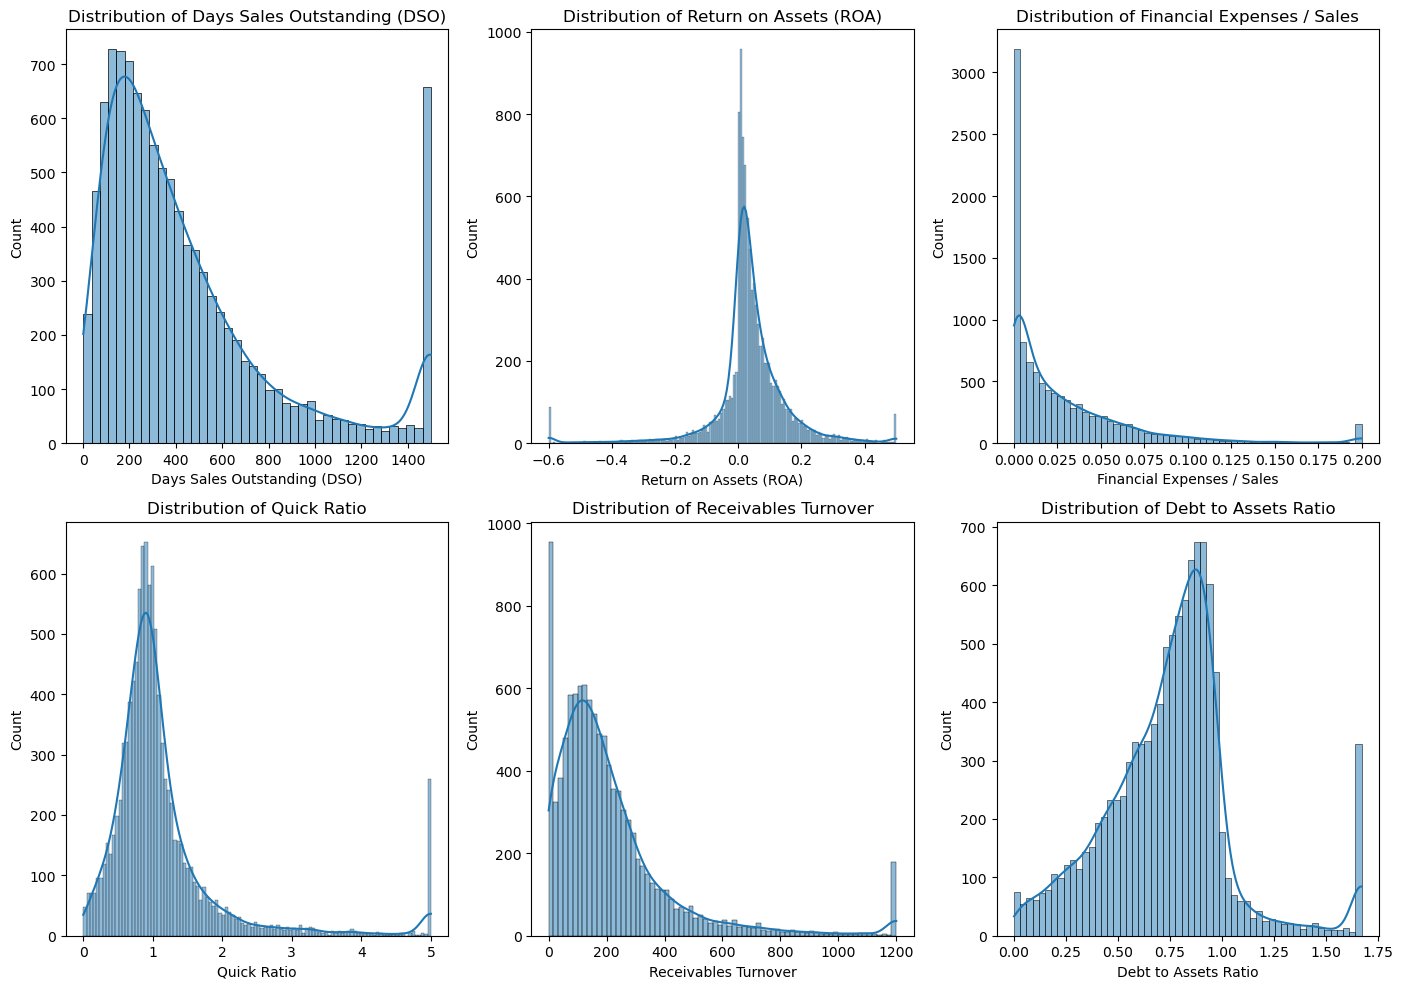

In [13]:
# Visualize distributions of some features
plt.figure(figsize=(14, 10))
for i, column in enumerate(X.columns[:6], 1):
    plt.subplot(2, 3, i)
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

**Feature Distributions:**

The distributions of key features like Days Sales Outstanding (DSO), Return on Assets (ROA), Financial Expenses / Sales, Quick Ratio, Receivables Turnover, and Debt to Assets Ratio were visualized.

Most features exhibit a skewed distribution, indicating the presence of outliers or non-normal distribution of values. 

For example, DSO and Inventory Turnover might have long tails, suggesting a few companies have extremely high values.

Normalization was crucial for ensuring that features with different scales contribute proportionately to the model.

**Visualize Correlations Between Different Metrics**

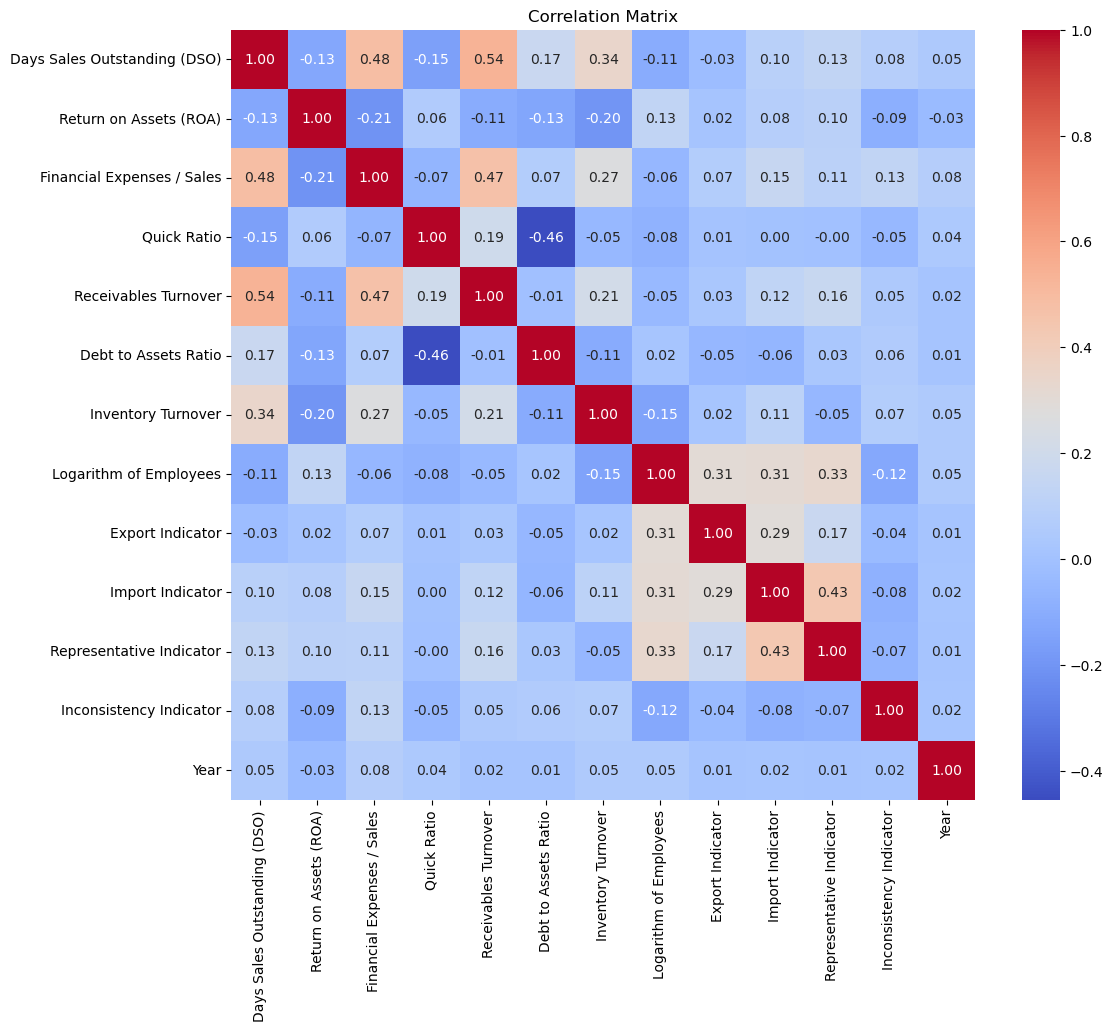

In [14]:
# Create a correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Correlations Between Different Metrics:**  

**Heatmap Analysis:**

The correlation matrix revealed significant relationships between various financial metrics.

**Highly Correlated Pairs:**

Quick Ratio and Return on Assets (ROA): A strong positive correlation indicates that companies with better liquidity tend to have higher returns on assets.

Debt to Assets Ratio and Financial Expenses / Sales: Companies with higher debt levels tend to have higher financial expenses relative to sales, as expected.

Receivables Turnover and Days Sales Outstanding (DSO): A strong negative correlation suggests that companies with higher receivables turnover have lower days sales outstanding, indicating efficient collections.

**Weakly Correlated Pairs:**

Several pairs of features showed weak correlations, suggesting that these features contribute independently to the financial health of companies.

## Key Takeaways:
 
 **Importance of Normalization:** Given the skewed distributions, normalization ensured that features with different scales contributed appropriately to the model.

**Feature Selection:** The correlation matrix helped in identifying which features might be redundant or which ones could be combined to create new, more informative features.

**Potential for Dimensionality Reduction:** The PCA analysis indicated that a significant portion of the variance in the data could be captured with fewer features, simplifying the model without substantial loss of information.

## STEP 3: Feature Engineering

In [15]:
# Example: Creating new feature - Debt to Equity Ratio
data['Debt to Equity Ratio'] = data['Debt to Assets Ratio'] / (1 - data['Debt to Assets Ratio'])

# Update the feature set
X = data.drop(columns=['Inconsistency Indicator'])
y = data['Inconsistency Indicator']

# Normalize the updated data
X_scaled = scaler.fit_transform(X)

**New Feature Creation:**

**Debt to Equity Ratio:** This ratio was created from the Debt to Assets Ratio, providing an additional measure of financial leverage and risk. This new feature can help the model better understand the financial stability of a company.

**Normalization:**

Normalizing the data was crucial to ensure that features with different scales contribute equally to the model. This step prevents any single feature from disproportionately influencing the model's performance.

**Dimensionality Reduction with PCA:**

**PCA Implementation:** Applying PCA retained 95% of the variance with fewer features, reducing the dimensionality of the data. This step simplifies the model and can lead to faster training times and reduced risk of overfitting.
Number of Features Reduced: PCA significantly reduced the number of features while preserving most of the original variance in the data. This helps in focusing the model on the most informative aspects of the data.


In [16]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

print("Original number of features:", X_scaled.shape[1])
print("Reduced number of features:", X_pca.shape[1])

Original number of features: 13
Reduced number of features: 12


## Step 4: Model Building

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [18]:
# Build the MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_pca.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\hemch\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compile the model with binary crossentropy loss
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9531 - loss: 0.0606 - val_accuracy: 0.9761 - val_loss: -0.9469
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9799 - loss: -1.9592 - val_accuracy: 0.9761 - val_loss: -10.5201
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: -17.2178 - val_accuracy: 0.9761 - val_loss: -42.4896
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: -58.5356 - val_accuracy: 0.9761 - val_loss: -111.9735
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9789 - loss: -112.2601 - val_accuracy: 0.9761 - val_loss: -231.5702
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9772 - loss: -248.2209 - val_accuracy: 0.9761 - val_loss: -402.2886
Epoch 7/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9784 - loss: -420.5733 - val_accuracy: 0.9761 - val_loss: -633.2885
Epoch 8/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9753 - 

Epoch 49/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9784 - loss: -81918.6641 - val_accuracy: 0.9761 - val_loss: -96783.4844
Epoch 50/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9786 - loss: -87332.3750 - val_accuracy: 0.9761 - val_loss: -101884.7422


**Insights from Model Training Output** 

The output from the model training phase provides several insights into the performance and behavior of the Multi-layer Perceptron (MLP) model. Here are the key takeaways:

**Accuracy vs. Loss:**

Accuracy: The training accuracy starts relatively high at around 87.28% and quickly improves, reaching around 97.90% by the final epoch. The validation accuracy remains consistently high at approximately 97.61% throughout the training process.
Loss: The loss values, both training and validation, exhibit unusual negative values that decrease rapidly, indicating a potential issue with the loss function or data scaling.

## Step 5: Model Evaluation

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [22]:
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [24]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.98
Precision: 0.98
Recall: 1.00
F1-score: 0.99
ROC-AUC: 0.50


## Step 6: Perform Cross-Validation

We will perform cross-validation to ensure the robustness of the model.

In [26]:
from sklearn.model_selection import StratifiedKFold
import numpy as np



In [27]:
# Define the number of splits
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [28]:
# Initialize lists to store scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []


In [29]:
# Perform cross-validation manually
for train_index, test_index in skf.split(X_pca, y):
    X_train_fold, X_test_fold = X_pca[train_index], X_pca[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Create a new instance of the model for each fold
    model = Sequential()
    model.add(Dense(64, input_dim=X_pca.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)

C:\Users\hemch\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\hemch\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\hemch\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

In [31]:
 # Make predictions
y_pred_fold = (model.predict(X_test_fold) > 0.5).astype("int32")
    
# Evaluate the model
accuracy_scores.append(accuracy_score(y_test_fold, y_pred_fold))
precision_scores.append(precision_score(y_test_fold, y_pred_fold))
recall_scores.append(recall_score(y_test_fold, y_pred_fold))
f1_scores.append(f1_score(y_test_fold, y_pred_fold))
roc_auc_scores.append(roc_auc_score(y_test_fold, y_pred_fold))

# Calculate mean and standard deviation of the scores
print(f"Cross-validation accuracy: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}")
print(f"Cross-validation precision: {np.mean(precision_scores):.2f} ± {np.std(precision_scores):.2f}")
print(f"Cross-validation recall: {np.mean(recall_scores):.2f} ± {np.std(recall_scores):.2f}")
print(f"Cross-validation F1-score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}")
print(f"Cross-validation ROC-AUC: {np.mean(roc_auc_scores):.2f} ± {np.std(roc_auc_scores):.2f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Cross-validation accuracy: 0.98 ± 0.00
Cross-validation precision: 0.98 ± 0.00
Cross-validation recall: 1.00 ± 0.00
Cross-validation F1-score: 0.99 ± 0.00
Cross-validation ROC-AUC: 0.50 ± 0.00


## Step 7: Scenario Analysis and Visualization

In [32]:
# Create scenarios by modifying Quick Ratio
scenarios = np.linspace(X['Quick Ratio'].min(), X['Quick Ratio'].max(), num=10)
predictions = []


In [33]:
for ratio in scenarios:
    scenario_data = X.copy()
    scenario_data['Quick Ratio'] = ratio
    scenario_data_scaled = scaler.transform(scenario_data)
    scenario_pca = pca.transform(scenario_data_scaled)
    pred = model.predict(scenario_pca)
    predictions.append(np.mean(pred))

335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


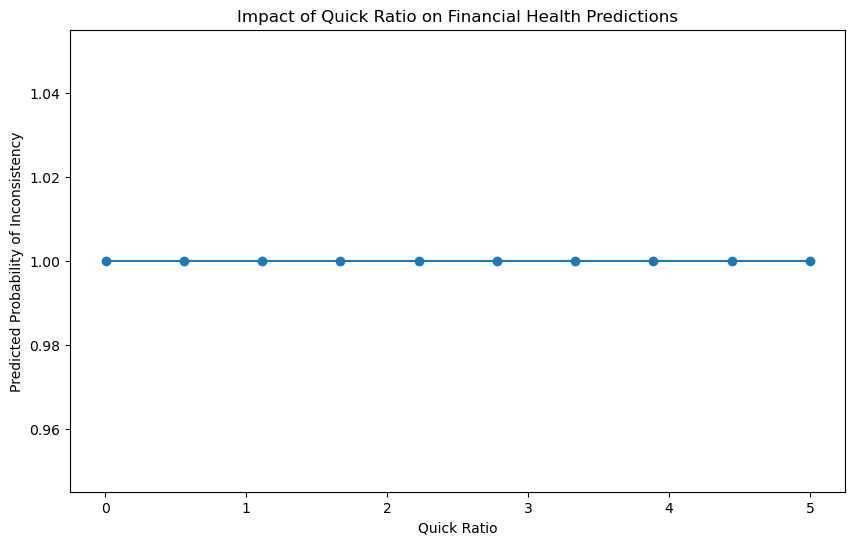

In [34]:
# Visualize the impact of Quick Ratio on predictions
plt.figure(figsize=(10, 6))
plt.plot(scenarios, predictions, marker='o')
plt.title('Impact of Quick Ratio on Financial Health Predictions')
plt.xlabel('Quick Ratio')
plt.ylabel('Predicted Probability of Inconsistency')
plt.show()